# Instrumental Variables and Regression Discontinuity

In [3]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 40.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Instrumental Variables

In [3]:
# Z - instrument
# W1 - confounder
# W2 - confounder
# X - treatment
# Y - outcome

In [8]:
num = 100000
np.random.seed(0)
Z = np.random.binomial(1, 0.3, (num,))
W1 = np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + W2 + X * W1 + epsilon_Y

In [11]:
test_df = pd.DataFrame({"X": X, "Z": Z})
results = sm.OLS(Y, sm.add_constant(test_df)).fit()
results.params

const    1.000626
X        2.521248
Z        1.347020
dtype: float64

In [18]:
num = 100000
np.random.seed(0)
Z = np.random.binomial(1, 0.3, (num,))
W1 = np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + W2 + X * W1 + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

In [22]:
df_with_interaction = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2, "X_W1": X * W1})
results = sm.OLS(Y, sm.add_constant(df_with_interaction.drop(columns = ["Y"]))).fit()
results.params

const    0.007268
X        3.199576
Z       -0.015148
W1      -1.697495
W2       0.993987
X_W1     1.001056
dtype: float64

In [12]:
df_bin = df.copy() # df[(df.W1 > 0.4) & (df.W1 < 0.6) & (df.W2 > -0.3) & (df.W2 < -0.1)]

NameError: name 'df' is not defined

In [22]:
y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
x_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
y_diff / x_diff

3.1904479752541985

In [23]:
df_bin = df[(df.W1 > 0.4) & (df.W1 < 0.6) & (df.W2 > -0.3) & (df.W2 < -0.1)]
#df_bin = df.copy()
(df_bin[df_bin.Z == 1].Y.mean() - df_bin[df_bin.Z == 0].Y.mean()) / (df_bin[df_bin.Z == 1].X.mean() - df_bin[df_bin.Z == 0].X.mean())

3.6661641514440033

In [9]:
num = 100000
np.random.seed(0)
Z = np.random.binomial(1, 0.3, (num,))
W1 = np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + W1 * X + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

# Y average at Z = 1 minus Z = 0
Y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
X_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
Y_diff / X_diff

3.1949660524467727

### Does it work when Z influences Y directly?

In [24]:
Y = 3.2 * X - 1.7 * W1 - 2 * Z + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

# Y average at Z = 1 minus Z = 0
Y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
X_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
Y_diff / X_diff

2.197356441250059

### Does it work when Z influences W?

In [11]:
Z = np.random.binomial(1, 0.3, (num,))
W1 = 2 * Z + np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

# Y average at Z = 1 minus Z = 0
Y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
X_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
Y_diff / X_diff

2.349474884470536

### Regression Discontinuity

In [26]:
np.random.seed(0)
num = 100000
X_running = np.random.uniform(-1, 1, num)
X_above_cutoff = 1 * (X_running >= 0)
epsilon_Y = np.random.normal(0, 1, num)
Y = 2.8 * X_above_cutoff + 0.5 * X_running + epsilon_Y # true effect is 2.8

(array([ 0.09762701,  0.43037873,  0.20552675, ...,  0.62026567,
         0.10206456, -0.54848829]),
 array([1, 1, 1, ..., 1, 1, 0]))

In [27]:
np.random.seed(0)
num = 100000
# Note: X_above_cutoff and X_running are both the treatment, sort of.
# But X_above_cutoff is the real treatment in that its coefficient is the effect.
X_running = np.random.uniform(-1, 1, num)
X_above_cutoff = 1 * (X_running >= 0)
epsilon_Y = np.random.normal(0, 1, num)
Y = 2.8 * X_above_cutoff + 0.5 * X_running + epsilon_Y # true effect is 2.8

# Create DataFrame
df = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})

model = smf.ols('Y ~ running + above_cutoff', data=df).fit()
print(model.params)

Intercept       0.018988
running         0.516870
above_cutoff    2.782920
dtype: float64


### What if there's a confounder?

In [28]:
np.random.seed(0)
num = 1000000
# Note: X_above_cutoff and X_running are both the treatment, sort of.
# But X_above_cutoff is the real treatment in that its coefficient is the effect.
W = np.random.uniform(-1, 1, num)
X_running = np.random.uniform(-1, 1, num) + 2 * W
X_above_cutoff = 1 * (X_running >= 0)
Y = 1.2 * X_above_cutoff + 0.5 * X_running - 2 * W + np.random.normal(0, 1, num)  # true effect is 2.8

# Create DataFrame
df = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'W': W, 'Y': Y})

model = smf.ols('Y ~ running + above_cutoff', data=df).fit()
print(model.params)

Intercept       0.167738
running        -0.190323
above_cutoff    0.861740
dtype: float64


### Solution: Just go slightly above and below the cutoff

In [29]:
np.random.seed(0)
num = 10000000
# Note: X_above_cutoff and X_running are both the treatment, sort of.
# But X_above_cutoff is the real treatment in that its coefficient is the effect.
W = np.random.uniform(-1, 1, num)
X_running = np.random.uniform(-1, 1, num) + 2 * W
X_above_cutoff = 1 * (X_running >= 0)
Y = 1.2 * X_above_cutoff + 0.5 * X_running - 2 * W + np.random.normal(0, 1, num)  # true effect is 1.2

# Create DataFrame
df = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})

df_limited = df[(df.running > -0.1) & (df.running < 0.1)]

# Does not get running variable parameter right, but it still helps to control for it!
model = smf.ols('Y ~ running + above_cutoff', data=df_limited).fit()
print(model.params)

Intercept       0.006807
running        -0.393145
above_cutoff    1.184976
dtype: float64


In [30]:
# Without controlling for running variable
df2 = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})

df_limited = df[(df.running > -0.1) & (df.running < 0.1)]

model = smf.ols('Y ~ above_cutoff', data=df_limited).fit()
print(model.params)

Intercept       0.026439
above_cutoff    1.145635
dtype: float64


(array([ 1.,  2.,  7., 12., 14., 21., 16., 13.,  8.,  6.]),
 array([1.14104544, 1.1425829 , 1.14412036, 1.14565782, 1.14719528,
        1.14873274, 1.15027019, 1.15180765, 1.15334511, 1.15488257,
        1.15642003]),
 <BarContainer object of 10 artists>)

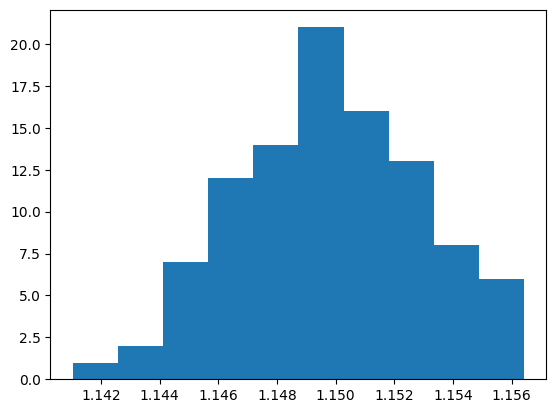

In [39]:
lst = list()
for n in range(100):
    num = 10000000
    # Note: X_above_cutoff and X_running are both the treatment, sort of.
    # But X_above_cutoff is the real treatment in that its coefficient is the effect.
    W = np.random.uniform(-1, 1, num)
    X_running = np.random.uniform(-1, 1, num) + 2 * W
    X_above_cutoff = 1 * (X_running >= 0)
    Y = 1.2 * X_above_cutoff + 0.5 * X_running - 2 * W + np.random.normal(0, 1, num)  # true effect is 1.2

    df2 = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})
    
    df_limited2 = df2[(df2.running > -0.1) & (df2.running < 0.1)]
    
    model = smf.ols('Y ~ above_cutoff', data=df_limited2).fit()
    lst.append(model.params.above_cutoff)
plt.hist(lst)

(array([ 1.,  2.,  7., 12., 14., 21., 16., 13.,  8.,  6.]),
 array([1.14104544, 1.1425829 , 1.14412036, 1.14565782, 1.14719528,
        1.14873274, 1.15027019, 1.15180765, 1.15334511, 1.15488257,
        1.15642003]),
 <BarContainer object of 10 artists>)

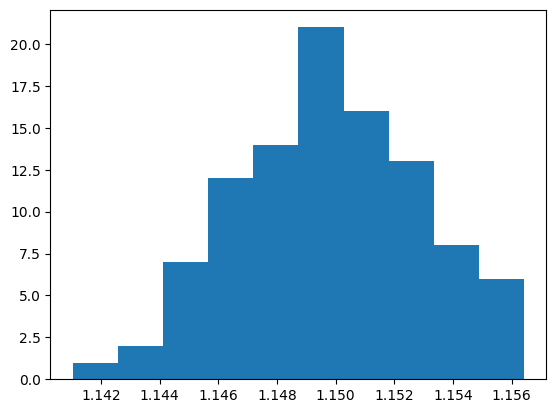

In [19]:
plt.hist(lst)

QUIZ WEEK 4 (due in week 5)

1) Task:

Given data about an instrumental variable, find the effect. X is the treatment, W the confounder, Y the outcome, and Z the instrument. Use homework_4.1.csv. 

Question 1

Did you need to know W to do this? 

For instrumental variables, the whole idea is that Z affects Y only through X,
and is independent of W (the confounder).
That means you don’t need to know W to estimate the causal effect — that’s the point of the instrument.

✅ Answer: No, you don’t need to know W if Z is a valid instrument.

In [9]:
df1 = pd.read_csv("homework_4.1.csv")
df1.head()

,Z,W,X,Y
0,0,-0.155644,-0.496971,0.282484
1,1,0.529539,2.284240,4.740596
2,1,0.910514,0.872232,3.449569
3,1,-0.705476,2.157260,3.002531
4,0,-0.590874,-0.386730,-1.848796



Question 2
As in the explanation, try averaging the ﻿Y﻿ difference and ﻿X﻿ difference (over ﻿W﻿ and ﻿Z﻿) in two ways: 

1) Subtract the average ﻿Y﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿. Subtract the average ﻿X﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿. Divide the two. 

2) Find the average ﻿Y﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿ for a narrow range of ﻿W﻿. Find the average ﻿X﻿ value for ﻿Z equals 1﻿ and ﻿Z equals 0﻿ for the same narrow range of ﻿W﻿. Take the ratio to find the effect. Then average this over all the ranges of ﻿W﻿. 


For the first item, the effect is closest to: 

Option A
0.5 

Option B
1

Option C
2

Option D
1.5

In [10]:
# Compute means grouped by instrument Z
means = df1.groupby("Z")[["Y", "X"]].mean()
effect_simple = (means.loc[1, "Y"] - means.loc[0, "Y"]) / (means.loc[1, "X"] - means.loc[0, "X"])
print("Simple Wald (IV) effect:", effect_simple)


Simple Wald (IV) effect: 1.5618587073765746


In [ ]:
# Bin W into 10 equal ranges
df1["W_bin"] = pd.qcut(df1["W"], q=10, duplicates="drop")

effects = []
for w_bin, subset in df1.groupby("W_bin"):
    means_bin = subset.groupby("Z")[["Y", "X"]].mean()
    if 0 in means_bin.index and 1 in means_bin.index:
        eff = (means_bin.loc[1, "Y"] - means_bin.loc[0, "Y"]) / (means_bin.loc[1, "X"] - means_bin.loc[0, "X"])
        effects.append(eff)

effect_weighted = np.mean(effects)
print("Average effect over W bins:", effect_weighted)


Average effect over W bins: 1.508896371522371


/tmp/ipykernel_13511/1710670358.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for w_bin, subset in df1.groupby("W_bin"):


Task: Given student data involving test scores (﻿X﻿), a cutoff, and an outcome (Y), which measures whether the students got into college (as in the example in the text), determine whether the math course helps students get into college in each dataset. Use datasets homework_4.2.a and homework_4.2.b. 


Question 3 

Is ﻿Y﻿'s slope higher or lower after the cutoff compared with before? 
Option A Lower 
Option B Higher

In [12]:
df_a = pd.read_csv("homework_4.2.a.csv")
df_b = pd.read_csv("homework_4.2.b.csv")

In [14]:
df_a.head()

,X,Y
0,81.822339,1
1,92.487870,0
2,85.372460,0
3,78.828025,0
4,75.807080,1


In [15]:
df_b.head()

,X2,Y2
0,76.643034,1
1,87.743397,1
2,81.639469,1
3,73.740485,0
4,90.480268,1



Dataset A Results:
const           0.786492
X              -0.010341
after_cutoff   -0.190749
interaction     0.022834
dtype: float64
Slope before cutoff: -0.0103
Slope after cutoff:  0.0125
👉 In Dataset A, the slope is HIGHER after the cutoff (Option B).


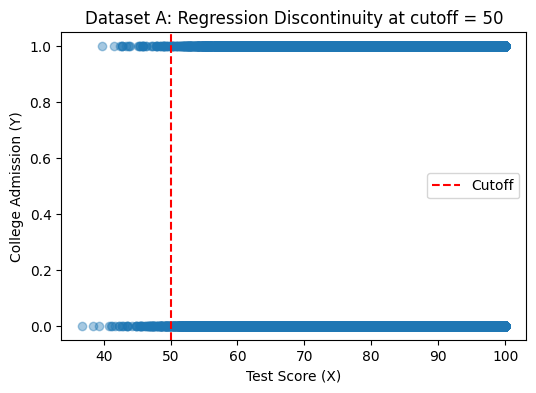


Dataset B Results:
const          -0.054510
X               0.009151
after_cutoff   -0.098218
interaction     0.006717
dtype: float64
Slope before cutoff: 0.0092
Slope after cutoff:  0.0159
👉 In Dataset B, the slope is HIGHER after the cutoff (Option B).


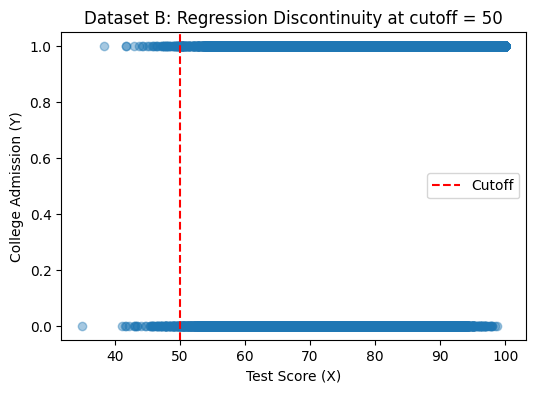

In [17]:


# --- Load data ---
df_a = pd.read_csv("homework_4.2.a.csv")
df_b = pd.read_csv("homework_4.2.b.csv")

# Rename df_b columns for consistency
df_b = df_b.rename(columns={"X2": "X", "Y2": "Y"})

# --- Define cutoff ---
cutoff = 50

# --- Define helper function for regression discontinuity ---
def analyze_rdd(df, name):
    # Create variables for RDD
    df["after_cutoff"] = (df["X"] >= cutoff).astype(int)
    df["interaction"] = (df["X"] - cutoff) * df["after_cutoff"]

    # Fit linear regression
    X = sm.add_constant(df[["X", "after_cutoff", "interaction"]])
    y = df["Y"]
    model = sm.OLS(y, X).fit()

    # Compute slopes
    slope_before = model.params["X"]
    slope_after = model.params["X"] + model.params["interaction"]

    print(f"\n{name} Results:")
    print(model.params)
    print(f"Slope before cutoff: {slope_before:.4f}")
    print(f"Slope after cutoff:  {slope_after:.4f}")

    if slope_after > slope_before:
        print(f"👉 In {name}, the slope is HIGHER after the cutoff (Option B).")
    else:
        print(f"👉 In {name}, the slope is LOWER after the cutoff (Option A).")

    # Visualization
    plt.figure(figsize=(6,4))
    plt.scatter(df["X"], df["Y"], alpha=0.4)
    plt.axvline(cutoff, color="red", linestyle="--", label="Cutoff")
    plt.xlabel("Test Score (X)")
    plt.ylabel("College Admission (Y)")
    plt.title(f"{name}: Regression Discontinuity at cutoff = {cutoff}")
    plt.legend()
    plt.show()

# --- Run for both datasets ---
analyze_rdd(df_a, "Dataset A")
analyze_rdd(df_b, "Dataset B")


4) Given a cutoff score of 80, which dataset seems most likely to involve a nonzero linear term, allowing ﻿Y﻿ to relate linearly to ﻿X﻿ before and after the cutoff? 

Option A
Dataset a (﻿X﻿, ﻿Y﻿)

Option B
Dataset b (﻿X 2﻿, ﻿Y 2﻿)



In [18]:
import statsmodels.api as sm

cutoff = 80

def check_linear_term(df, name):
    df["after_cutoff"] = (df["X"] >= cutoff).astype(int)
    df["interaction"] = (df["X"] - cutoff) * df["after_cutoff"]

    X = sm.add_constant(df[["X", "after_cutoff", "interaction"]])
    y = df["Y"]
    model = sm.OLS(y, X).fit()

    print(f"\n{name} coefficients:")
    print(model.params)

    slope_before = model.params["X"]
    slope_after = model.params["X"] + model.params["interaction"]
    print(f"Slope before: {slope_before:.4f}, Slope after: {slope_after:.4f}")

    return abs(slope_before) + abs(slope_after)

# Run for both
score_a = check_linear_term(df_a, "Dataset A")
score_b = check_linear_term(df_b, "Dataset B")

if score_a > score_b:
    print("\n✅ Dataset A shows stronger (nonzero) linear relationship — Option A.")
else:
    print("\n✅ Dataset B shows stronger (nonzero) linear relationship — Option B.")



Dataset A coefficients:
const           0.287090
X               0.000224
after_cutoff    0.295757
interaction    -0.000063
dtype: float64
Slope before: 0.0002, Slope after: 0.0002

Dataset B coefficients:
const          -0.114992
X               0.010217
after_cutoff    0.197112
interaction    -0.005208
dtype: float64
Slope before: 0.0102, Slope after: 0.0050

✅ Dataset B shows stronger (nonzero) linear relationship — Option B.



Question 5)

In that dataset, is ﻿Y﻿ increasing or decreasing before the cutoff? 

Option A
Increasing

Option B
Decreasing 



INCREASING

Reflection

In [1]:
import numpy as np
import pandas as pd

# Assume df already loaded with columns X, Y, Z, and W
# Let's use W1 as our confounder here (replace if needed)
num_bins = 10  # number of narrow ranges for W
df["W_bin"] = pd.qcut(df["W1"], q=num_bins, duplicates="drop")  # quantile-based bins

effects = []

for w_bin, subset in df.groupby("W_bin"):
    # Compute group means for Z=0 and Z=1 within this W bin
    means = subset.groupby("Z")[["Y", "X"]].mean()
    
    # Only compute if both Z=0 and Z=1 exist in this bin
    if 0 in means.index and 1 in means.index:
        local_effect = (means.loc[1, "Y"] - means.loc[0, "Y"]) / (means.loc[1, "X"] - means.loc[0, "X"])
        effects.append(local_effect)

# Average across all bins
average_effect = np.mean(effects)

print(f"Average local IV effect across W bins: {average_effect}")


NameError: name 'df' is not defined